# Homework Assignment  5

In [1]:
!pip install turicreate
!pip install tqdm
!pip install karateclub

In [2]:
import turicreate as tc
import networkx as nx
import random 
from tqdm import tqdm_notebook as tqdm 
import karateclub
import pandas as pd
import os, re
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

**Question 1:** Select a directed network, and develop a simple
    link prediction classifier based on the network's directed topology (40pt). 
    Use node or link embedding features and try to improve the classification (20pt)
    
**Bonus:** Evaluate the classifier's ability to predict future links (10pt)
    
** Note:** You can use [Reddit community networks](http://dynamics.cs.washington.edu/data.html), or search
for networks using [The Colorado Index of Complex Networks](https://icon.colorado.edu/).

In [3]:
DATASET = 'bitcoin'
FILENAME = 'bitcoin.tar.gz'
DOWNLOAD = f'http://dynamics.cs.washington.edu/nobackup/{DATASET}/{FILENAME}'
!rm -r *
!ls

!mkdir -p ./datasets/$DATASET/zip
!mkdir -p ./datasets/$DATASET/data
!ls ./datasets/$DATASET

!wget $DOWNLOAD -O ./datasets/$DATASET/zip/$FILENAME
!ls ./datasets/$DATASET/zip

!tar -xf ./datasets/$DATASET/zip/$FILENAME -C ./datasets/$DATASET/data
!rm -r ./datasets/$DATASET/zip/


data  zip
--2020-11-21 15:37:04--  http://dynamics.cs.washington.edu/nobackup/bitcoin/bitcoin.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 678858686 (647M) [application/x-gzip]
Saving to: ‘./datasets/bitcoin/zip/bitcoin.tar.gz’

./datasets/bitcoin/ 100%[===================>] 647.41M  14.6MB/s    in 37s     

2020-11-21 15:37:42 (17.5 MB/s) - ‘./datasets/bitcoin/zip/bitcoin.tar.gz’ saved [678858686/678858686]

bitcoin.tar.gz


In [4]:
print("Iv'e chose bitcoin because it's the smallest")

Iv'e chose bitcoin because it's the smallest


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:102: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Train size 16045
Test size: 3955
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 15242

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.012647     | 0.606548          | 0.587796            | 0.663742          | 0.663705            |

| 2         | 0.022701     | 0.606548          | 0.587796            | 0.647720          | 0.648002            |

| 3         | 0.032471     | 0.606548          | 0.587796            | 0.637912          | 0.638591            |

| 4         | 0.042441     | 0.606548          | 0.587796            | 0.631551          | 0.632625            |

| 5         | 0.050649     | 0.606548          | 0.587796            | 0.627277          | 0.628714            |

| 10        | 0.091151     | 0.606548          | 0.587796            | 0.619045          | 0.621680            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 15242

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.012017     | 0.606548          | 0.587796            | 0.628930          | 0.631302            |

| 2         | 0.021223     | 0.606548          | 0.587796            | 0.628897          | 0.631219            |

| 3         | 0.032661     | 0.606548          | 0.587796            | 0.628922          | 0.631237            |

| 4         | 0.041690     | 0.606548          | 0.587796            | 0.628937          | 0.631293            |

| 5         | 0.052093     | 0.606548          | 0.587796            | 0.628942          | 0.631260            |

| 10        | 0.092531     | 0.606548          | 0.587796            | 0.628947          | 0.631211            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 15242

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.011801     | 0.606548          | 0.587796            | 0.628903          | 0.631102            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 15242

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

Number of coefficients    : 5

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.010304     | 0.606548          | 0.587796            |

| 1         | 9        | 19.248136 | 0.044015     | 0.558654          | 0.533001            |

| 2         | 10       | 19.248136 | 0.053419     | 0.559638          | 0.534247            |

| 3         | 13       | 0.342017  | 0.067582     | 0.558654          | 0.533001            |

| 4         | 16       | 1.710087  | 0.081534     | 0.563049          | 0.534247            |

| 9         | 30       | 0.591276  | 0.143404     | 0.586931          | 0.557908            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 15242

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

Number of coefficients      : 5

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.025070     | 0.567052          | 0.536737            |

| 2         | 3        | 0.039152     | 0.570266          | 0.539228            |

| 3         | 4        | 0.054282     | 0.574137          | 0.541719            |

| 4         | 5        | 0.065014     | 0.579976          | 0.549191            |

| 5         | 6        | 0.079439     | 0.588046          | 0.559153            |

| 10        | 11       | 0.141306     | 0.606548          | 0.587796            |

+-----------+----------+--------------+-------------------+---------------------+

Completed (Iteration limit reached).

This model may not be optimal. To improve it, consider increasing `max_iterations`.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.5877957658779577
PROGRESS: RandomForestClassifier          : 0.5877957658779577
PROGRESS: DecisionTreeClassifier          : 0.5877957658779577
PROGRESS: SVMClassifier                   : 0.5579078455790785
PROGRESS: LogisticClassifier              : 0.5877957658779577
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.
Class                          : BoostedTreesClassifier

Schema
------
Number of examples             : 15242
Number of feature columns      : 4
Number of unpacked features    : 4
Number of classes              : 2

Settings
--------
Number of trees                : 10
Max tree depth                 : 6
Training time (sec)            : 0.0916
Training accuracy              : 0.6065
Validation accuracy            : 0.5878
Training log

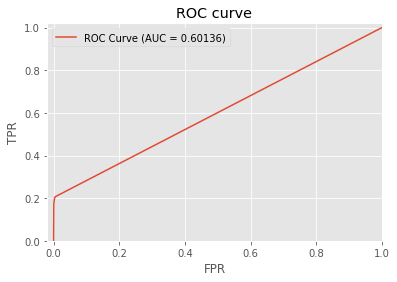

+-------+--------------------+
| class |    probability     |
+-------+--------------------+
|   0   | 0.5589672029018402 |
|   0   | 0.5589672029018402 |
|   1   | 0.7772928476333618 |
|   0   | 0.5589672029018402 |
|   0   | 0.5589672029018402 |
|   1   | 0.9770554304122925 |
|   0   | 0.5589672029018402 |
|   0   | 0.5589672029018402 |
|   0   | 0.5589672029018402 |
|   0   | 0.5589672029018402 |
+-------+--------------------+
[3955 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [5]:
FOLDER = 'bitcoin'
FILE_PATH = f'./datasets/{DATASET}/data/{FOLDER}'

bc_sf = tc.SGraph(vertices=tc.load_sframe(f'{FILE_PATH}/bitcoin.vertices.sframe'),
                     edges=tc.load_sframe(f'{FILE_PATH}/bitcoin.links.sframe')[:10000],
                     vid_field="vid",
                     src_field="src_id",
                     dst_field="dst_id")

def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g

g = sgraph2nxgraph(bc_sf,
                      is_directed=True,
                      add_vertices_attributes=True,
                      add_edges_attributes=True)


def select_random_existing_links(g, n):
    l =list(g.edges())
    random.shuffle(l)
    return l[:n]

def select_random_non_existing_links(g, n):
    select_links = set()
    v_list = list(g.nodes())
    while len(select_links) < n:
        u = random.choice(v_list)
        v = random.choice(v_list)
        if g.has_edge(u,v) or (u,v) in select_links and u == v:
            continue
        else:
            select_links.add((u,v))
    return list(select_links)
            
    
postive_links = select_random_existing_links(g,10000)
negative_links = select_random_non_existing_links(g,10000)

def common_friends(g,u,v):
    if not g.has_node(u) or not g.has_node(v):
        return None
    return set(g.neighbors(u)) & set(g.neighbors(v))

def friends_measure(g, u,v):
    s = 0
    for x in find_friends_of_friends(g,u):
        for y in find_friends_of_friends(g,v):
            if g.has_edge(x,y) or x == y:
                s += 1
    return s

def total_friends(g, u, v):   
    return len(set(g.neighbors(v)) | set(g.neighbors(u)))

def get_features_dict(g,u, v):
    removed_edge = False
    if g.has_edge(u,v):
        g.remove_edge(u,v) #  remove edge before feature calculation
        removed_edge = True
    try:
        d = {
            'degree_v': len(list(g.neighbors(v))),
            'degree_u': len(list(g.neighbors(u))),
            'total_friends': total_friends(g,u,v),
            'common_friends': len(common_friends(g,u,v))
        }
    except:
        if removed_edge:
            g.add_edge(u,v) # return the edge back to the graph
        return None

    if removed_edge:
        g.add_edge(u,v) # return the edge back to the graph
    return d

links_features = []

for i in tqdm(range(len(postive_links))):    
    u,v = postive_links[i]
    d = get_features_dict(g, u,v)
    if d is None:
        continue
    d['class'] = True
    links_features.append(d)

for i in tqdm(range(len(negative_links))):    
    u,v = negative_links[i]
    d = get_features_dict(g, u,v )
    if d is None:
        continue
    d['class'] = False
    links_features.append(d)
features_list = [
                 'degree_v',
                 'degree_u',
                 'total_friends',
                 'common_friends',
                 'class'
                 ]
data_dict = {f:[] for f in features_list}
 

for d in links_features:
    for feature in features_list:
        data_dict[feature].append(d[feature])
sf = tc.SFrame(data_dict)
test, train  = sf.random_split(0.2)
print(f"Train size {len(train)}\nTest size: {len(test)}" )
features_list = [
                 'degree_v',
                 'degree_u',
                 'total_friends',
                 'common_friends'
                 ]
cls = tc.classifier.create(train,features=features_list, target="class")
print(cls)
results = cls.evaluate(test)
print(results)


plt.style.use('ggplot')
plt.plot(results['roc_curve']['fpr'],
         results['roc_curve']['tpr'],
         label='ROC Curve (AUC = %0.5f)' %results['auc'])

plt.xlim([-0.02, 1.0])
plt.ylim([0., 1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()
print(cls.classify(test))

**Part 2 of Q1**

In [6]:
ug = g.to_undirected() # Creating Undirected Graph
l =  zip(ug.nodes(), range(len(ug.nodes())))
l = list(l)
nodes_dict = dict(l)
r_node_dict = {v:k for k,v in nodes_dict.items()}
h = nx.Graph()
for e1,e2 in ug.edges():
  h.add_edge(nodes_dict[e1], nodes_dict[e2])
largest_cc = max(nx.connected_components(h), key=len)
h_lcc = nx.Graph()
l_cc =  zip(list(largest_cc), range(len(largest_cc)))
l_cc = list(l_cc)
nodes_dict_cc = dict(l_cc)
r_node_dict_cc = {v:k for k,v in nodes_dict_cc.items()}
for e1,e2 in h.edges():
  if e1 in largest_cc and e2 in largest_cc:
    h_lcc.add_edge(nodes_dict_cc[e1], nodes_dict_cc[e2])

model = karateclub.DeepWalk()
model.fit(h_lcc)
embedding = model.get_embedding()
postive_links_cc = select_random_existing_links(h_lcc,10000)
negative_links_cc = select_random_non_existing_links(h_lcc,10000)
links_features = []

for i in tqdm(range(len(postive_links_cc))):    
    u,v = postive_links_cc[i]
    d = get_features_dict(h_lcc, u, v)
    if d is None:
        continue
    d['class'] = True
    for j in range(len(embedding[0])):
        d[f'e_{j}'] = embedding[u][j] + embedding[v][j]
    links_features.append(d)

for i in tqdm(range(len(negative_links_cc))):    
    u,v = negative_links_cc[i]
    d = get_features_dict(h_lcc, u,v )
    if d is None:
        continue
    d['class'] = False
    for j in range(len(embedding[0])):
        d[f'e_{j}'] = embedding[u][j] + embedding[v][j]
    links_features.append(d)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 8078

Number of classes           : 2

Number of feature columns   : 132

Number of unpacked features : 132

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.064896     | 1.000000          | 0.997653            | 0.438007          | 0.439040            |

| 2         | 0.124852     | 1.000000          | 0.997653            | 0.296950          | 0.297821            |

| 3         | 0.170473     | 1.000000          | 0.997653            | 0.208006          | 0.210012            |

| 4         | 0.217123     | 1.000000          | 0.997653            | 0.148481          | 0.151498            |

| 5         | 0.261755     | 1.000000          | 0.997653            | 0.107274          | 0.111225            |

| 10        | 0.477770     | 1.000000          | 0.995305            | 0.023046          | 0.029616            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 8078

Number of classes           : 2

Number of feature columns   : 132

Number of unpacked features : 132

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.052425     | 0.999752          | 0.997653            | 0.128066          | 0.131030            |

| 2         | 0.087262     | 0.999257          | 0.997653            | 0.128125          | 0.132233            |

| 3         | 0.134033     | 0.999257          | 0.997653            | 0.128482          | 0.132460            |

| 4         | 0.183112     | 0.999010          | 0.997653            | 0.128709          | 0.132716            |

| 5         | 0.216444     | 0.999133          | 0.997653            | 0.128654          | 0.131714            |

| 10        | 0.424327     | 0.999629          | 0.997653            | 0.128420          | 0.131290            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 8078

Number of classes           : 2

Number of feature columns   : 132

Number of unpacked features : 132

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.060978     | 1.000000          | 0.997653            | 0.127653          | 0.131062            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 8078

Number of classes           : 2

Number of feature columns   : 132

Number of unpacked features : 132

Number of coefficients    : 133

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.090889     | 0.936123          | 0.920188            |

| 1         | 8        | 6.500000  | 0.233251     | 0.960262          | 0.946009            |

| 2         | 9        | 6.500000  | 0.286150     | 0.109309          | 0.107981            |

| 3         | 12       | 0.176023  | 0.377093     | 0.910498          | 0.884977            |

| 4         | 15       | 0.880117  | 0.472577     | 0.989725          | 0.983568            |

| 9         | 22       | 0.394517  | 0.774833     | 0.995048          | 0.995305            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 8078

Number of classes           : 2

Number of feature columns   : 132

Number of unpacked features : 132

Number of coefficients      : 133

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.278897     | 0.995296          | 0.997653            |

| 2         | 3        | 0.440959     | 0.995296          | 0.997653            |

| 3         | 4        | 0.601882     | 0.995296          | 0.997653            |

| 4         | 5        | 0.760157     | 0.995420          | 0.995305            |

| 5         | 6        | 0.921533     | 0.995791          | 0.995305            |

| 10        | 11       | 1.727336     | 0.996534          | 0.990610            |

+-----------+----------+--------------+-------------------+---------------------+

Completed (Iteration limit reached).

This model may not be optimal. To improve it, consider increasing `max_iterations`.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.9953051643192489
PROGRESS: RandomForestClassifier          : 0.9976525821596244
PROGRESS: DecisionTreeClassifier          : 0.9976525821596244
PROGRESS: SVMClassifier                   : 0.9953051643192489
PROGRESS: LogisticClassifier              : 0.9906103286384976
PROGRESS: ---------------------------------------------
PROGRESS: Selecting RandomForestClassifier based on validation set performance.
{'accuracy': 0.9986251145737856, 'auc': 0.9999999999999999, 'confusion_matrix': Columns:
	target_label	int
	predicted_label	int
	count	int

Rows: 3

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      0       |        0        |  2046 |
|      1       |        0        |   3   |
|      1       |        1        |  133  |
+--------------+--------

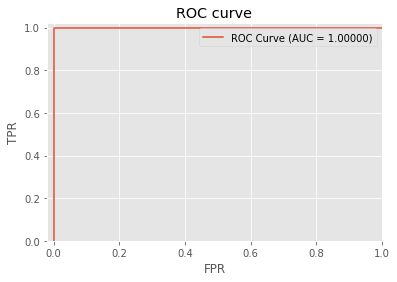

In [7]:
features_list = [
                 'degree_v',
                 'degree_u',
                 'total_friends',
                 'common_friends',
                 'class'
                 ]
                 
e_features_list = []
for i in range(len(embedding[0])):
  e_features_list.append(f'e_{i}')
features_list += e_features_list

data_dict = {f:[] for f in features_list} 

for d in links_features:
    for feature in features_list:
        data_dict[feature].append(d[feature])
sf = tc.SFrame(data_dict)
test, train  = sf.random_split(0.2)
features_list = [
                 'degree_v',
                 'degree_u',
                 'total_friends',
                 'common_friends'
                 ]
features_list += e_features_list                
cls = tc.classifier.create(train,features=features_list, target="class")
results = cls.evaluate(test)
print(results)

plt.style.use('ggplot')
plt.plot(results['roc_curve']['fpr'],
         results['roc_curve']['tpr'],
         label='ROC Curve (AUC = %0.5f)' %results['auc'])

plt.xlim([-0.02, 1.0])
plt.ylim([0., 1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

In [8]:
print("Embedding is Better!")

Embedding is Better!


**Question 2:** Use three different centrality algorithms to identify managers at Enron.
    Evaluate the precision@10 of the algorithms, i.e. how many managers attained the top-10 highest ranks (30pt). Draw 
    the network and visualize one of the centrality measures (10pt)
    

In [9]:
DATASET = 'enron'
FILENAME = 'enron_mail_20150507.tar.gz'
DOWNLOAD = f'https://www.cs.cmu.edu/~./{DATASET}/{FILENAME}'
!rm -r *
!ls
!mkdir -p ./datasets/$DATASET/zip
!mkdir -p ./datasets/$DATASET/data
!ls ./datasets/$DATASET

!wget $DOWNLOAD -O ./datasets/$DATASET/zip/$FILENAME
!ls ./datasets/$DATASET/zip

!tar -xf ./datasets/$DATASET/zip/$FILENAME -C ./datasets/$DATASET/data
!rm -r ./datasets/$DATASET/zip/


data  zip
--2020-11-21 15:41:58--  https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tar.gz
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443254787 (423M) [application/x-gzip]
Saving to: ‘./datasets/enron/zip/enron_mail_20150507.tar.gz’

./datasets/enron/zi 100%[===================>] 422.72M   626KB/s    in 11m 43s 

2020-11-21 15:53:42 (616 KB/s) - ‘./datasets/enron/zip/enron_mail_20150507.tar.gz’ saved [443254787/443254787]

enron_mail_20150507.tar.gz


In [10]:
roles_file = 'http://www.inf.ed.ac.uk/teaching/courses/tts/assessed/roles.txt'
pd_roles = pd.read_csv(roles_file, sep="	", header=None, error_bad_lines=False)
name_index = 0
description_index = 1
description_have_to_contains = 'Manag'
pd_roles["manager"] = pd_roles[description_index].apply(lambda emp_role: True if description_have_to_contains in emp_role else False)


enron_data_set_path = f"./datasets/{DATASET}/data/maildir"

def get_links_from_email(path):
    email_re = re.compile(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)")
    to_list = []
    from_list = []
    for line in open(path, "r", encoding='utf8', errors='ignore').readlines():
        line = line.strip().lower()
        if line.startswith("to:"):
            to_list = email_re.findall(line)
        if line.startswith("from:"):
            from_list = email_re.findall(line)
    links = set()
    if len(from_list) > 0 and len(to_list) >0:
        for e1 in from_list:
            for e2 in to_list:
                links.add((e1,e2))
    return links          

links = set()
files_list = [p for p in glob(f"{enron_data_set_path}/*/*/*") if "/inbox/" in p or "/sent/" in p]
print("Found %s files" % len(files_list))
for i in tqdm(range(len(files_list))):
    p = files_list[i]              
    if os.path.isfile(p):
        try:
            links |= get_links_from_email(p)
        except:
            continue


g = nx.DiGraph()
g.add_edges_from(links)
min_degree = 200
l = [n for n,degree in dict(g.degree()).items() if degree > min_degree]
h = g.subgraph(l)

b'Skipping line 140: expected 2 fields, saw 3\n'


Found 99279 files


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [11]:
def is_manager(empl):
  try:
    is_manager = pd_roles.loc[pd_roles[name_index].apply(lambda x: True if x in empl[0] else False), "manager"].values[0]  
    if is_manager:
      return True
    else:
      return False
  except:
    return False  

**By degree**

In [12]:
import operator
emp_degree = sorted(dict(g.degree()).items(), key=operator.itemgetter(1), reverse=True)[:10]
managers_count = 0
for empl in emp_degree:
  if is_manager(empl):
    managers_count += 1
print(f'{managers_count} managers attained the top10 ')

1 managers attained the top10 


**By eigenvector centrality**

In [14]:
eigenvector_centrality = sorted(dict(nx.eigenvector_centrality(g)).items(), key=operator.itemgetter(1), reverse=True)
managers_count_eigenvector = 0
for empl in eigenvector_centrality[:10]:
    if is_manager(empl):
        managers_count_eigenvector += 1
print(f'{managers_count_eigenvector} managers attained the top10 ')

2 managers attained the top10 


**By betweenness centrality**

In [15]:
betweenness = sorted(dict(nx.betweenness_centrality(h)).items(), key=operator.itemgetter(1), reverse=True)[:10]
managers_count_betweenness = 0
for empl in betweenness:
    if is_manager(empl):
        managers_count_betweenness += 1
print(f'{managers_count_betweenness} managers attained the top10 ')

1 managers attained the top10 


In [16]:
d = dict(betweenness[:30])
l = [name for name, desc in d.items()]

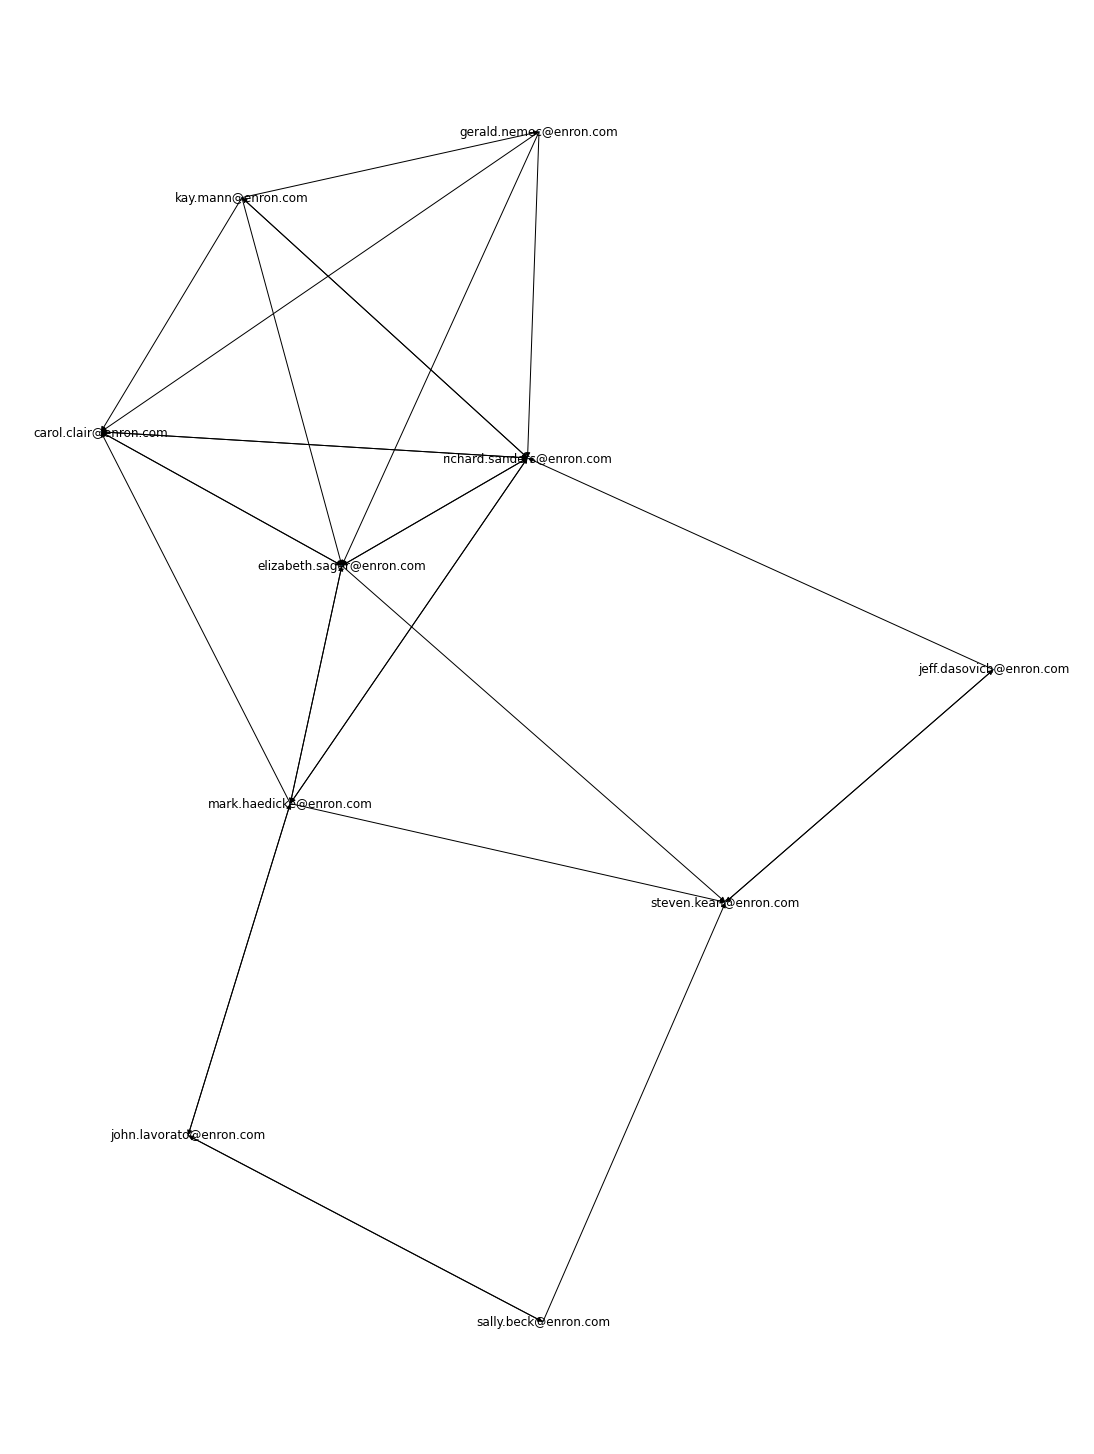

In [17]:
h = g.subgraph(l)
plt.figure(3, figsize=(15,20))
nx.draw_kamada_kawai(h, with_labels=True, node_size=[(d[node]) for node in h.nodes()])